In [27]:
import pandas.io.data
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


In [28]:
Pima = pd.read_csv('labs/data/pima-indians-diabetes.csv', header=None)


In [29]:
Pima.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
Pima.columns=['timespregnant', 'glucoseconc', 'dbp', 'trithickness', 'twohourins', 'bmi', 'pedigreef', 'age', 'class']

In [31]:
Pima.head()

,timespregnant,glucoseconc,dbp,trithickness,twohourins,bmi,pedigreef,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
Pima.describe().T

,count,mean,std,min,25%,50%,75%,max
timespregnant,768,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucoseconc,768,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
dbp,768,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
trithickness,768,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
twohourins,768,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigreef,768,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


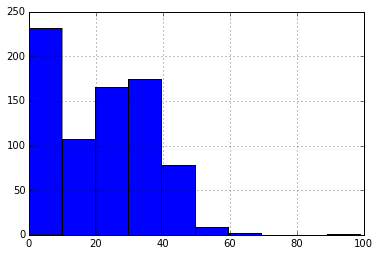

In [35]:
_ = Pima['trithickness'][~Pima.trithickness.isnull()].hist()

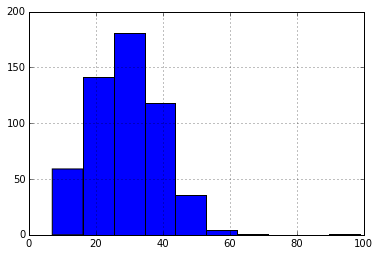

In [38]:
_ = Pima['trithickness'][Pima.trithickness > 0].hist()

In [39]:
Pima[Pima.trithickness > 0].describe().T

,count,mean,std,min,25%,50%,75%,max
timespregnant,541,3.512015,3.324759,0.000,1.000,2.000,5.00,17.00
glucoseconc,541,119.822551,32.894640,0.000,97.000,115.000,140.00,199.00
dbp,541,71.197782,13.007678,0.000,64.000,72.000,80.00,110.00
trithickness,541,29.153420,10.476982,7.000,22.000,29.000,36.00,99.00
twohourins,541,113.282810,122.735833,0.000,0.000,90.000,165.00,846.00
bmi,541,32.774122,7.144264,0.000,27.800,32.800,36.90,67.10
pedigreef,541,0.504850,0.346639,0.085,0.259,0.417,0.66,2.42
age,541,31.558226,10.743768,21.000,23.000,28.000,38.00,81.00
class,541,0.332717,0.471622,0.000,0.000,0.000,1.00,1.00


In [40]:
Pima[Pima.trithickness == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
timespregnant,227,4.638767,3.350062,0.000,2.000,4.000,7.0000,13.000
glucoseconc,227,123.449339,29.572931,44.000,105.000,120.000,140.5000,197.000
dbp,227,64.118943,28.839945,0.000,62.000,72.000,80.0000,122.000
trithickness,227,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000
twohourins,227,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000
bmi,227,30.129956,9.168249,0.000,25.150,30.400,35.0500,52.900
pedigreef,227,0.393291,0.276871,0.078,0.203,0.282,0.5365,1.781
age,227,37.251101,13.062933,21.000,27.000,34.000,45.0000,72.000
class,227,0.387665,0.488294,0.000,0.000,0.000,1.0000,1.000


In [ ]:
# Removing the missing data for tricept thickness would reduce the dataset by close to30% and would cause bias in the data as this feature is distributed differently amongst the subset with missing values and those without 

In [47]:
# There are 9 features - they are not normalised

Pima_norm = (Pima - Pima.mean())/(Pima.max() - Pima.min())
Pima_norm

,timespregnant,glucoseconc,dbp,trithickness,twohourins,bmi,pedigreef,age,class
0,0.126762,0.136208,0.023726,0.146096,-0.094326,0.023956,0.066236,0.279319,0.651042
1,-0.167356,-0.180375,-0.025455,0.085490,-0.094326,-0.080366,-0.051612,-0.037348,-0.348958
2,0.244409,0.312088,-0.041848,-0.207439,-0.094326,-0.129547,0.085450,-0.020681,0.651042
3,-0.167356,-0.160274,-0.025455,0.024884,0.016785,-0.058012,-0.130178,-0.204015,-0.348958
4,-0.226180,0.080932,-0.238569,0.146096,0.104256,0.165535,0.775458,-0.004015,0.651042
5,0.067938,-0.024596,0.040119,-0.207439,-0.094326,-0.095269,-0.115660,-0.054015,-0.348958
6,-0.049709,-0.215550,-0.156602,0.115793,0.009693,-0.014793,-0.095592,-0.120681,0.651042
7,0.362056,-0.029621,-0.566438,-0.207439,-0.094326,0.049291,-0.144268,-0.070681,-0.348958
8,-0.108532,0.382440,0.007332,0.247106,0.547518,-0.022244,-0.134021,0.329319,0.651042
9,0.244409,0.020630,0.220447,-0.207439,-0.094326,-0.476790,-0.102424,0.345985,0.651042


In [64]:
model = KNeighborsClassifier(10)

Pima 
to_predict = "class"
features=['timespregnant', 'glucoseconc', 'dbp', 'trithickness', 'twohourins', 'bmi', 'pedigreef', 'age']
X = Pima[features]
y = Pima[to_predict]
folds=5
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=0)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=10, p=2, weights='uniform')

In [67]:
model.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [69]:
model.score(X_test, y_test)

0.79220779220779225

In [70]:
from sklearn import metrics

print metrics.classification_report([Pima['class'][label] for label in y_test], 
                                    [Pima['class'][label] for label in model.predict(X_test)])

             precision    recall  f1-score   support

          0       0.70      0.55      0.62        47
          1       0.82      0.90      0.86       107

avg / total       0.78      0.79      0.78       154



In [55]:
cross_val_score(model, data, label, cv=3)

array([ 0.75875486,  0.71875   ,  0.73333333])

In [72]:
model = KNeighborsClassifier(50)

Pima 
to_predict = "class"
features=['timespregnant', 'glucoseconc', 'dbp', 'trithickness', 'twohourins', 'bmi', 'pedigreef', 'age']
X = Pima[features]
y = Pima[to_predict]
folds=5
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=0)
model.fit(X_train,y_train)
model.predict(X_test)
model.score(X_test, y_test)
from sklearn import metrics

print metrics.classification_report([Pima['class'][label] for label in y_test], 
                                    [Pima['class'][label] for label in model.predict(X_test)])
cross_val_score(model, data, label, cv=5)

             precision    recall  f1-score   support

          0       0.67      0.47      0.55        47
          1       0.79      0.90      0.84       107

avg / total       0.75      0.77      0.75       154



TypeError: Singleton array 0 cannot be considered a valid collection.

In [73]:
for n in range (1,50)

    model = KNeighborsClassifier(n)

    Pima 
    to_predict = "class"
    features=['timespregnant', 'glucoseconc', 'dbp', 'trithickness', 'twohourins', 'bmi', 'pedigreef', 'age']
    X = Pima[features]
    y = Pima[to_predict]
    folds=5
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=0)
    model.fit(X_train,y_train)
    model.predict(X_test)
    model.score(X_test, y_test)
    
    print metrics.classification_report([Pima['class'][label] for label in y_test], 
                                    [Pima['class'][label] for label in model.predict(X_test)])
    cross_val_score(model, data, label, cv=5)

SyntaxError: invalid syntax (<ipython-input-73-bb526caee148>, line 1)